In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from typing import List, Optional, Dict, Tuple
from tqdm import tqdm
import numpy as np
import os
import math

# 1. Load in the data

In [2]:
# makes an object of all the prediction files
def parse_filename(filepath):
    """Extract residues and label from filename"""
    filename = os.path.basename(filepath)  # Get filename without path
    parts = filename.split('_')
    residues = parts[0]  # 'ST' or 'Y'
    label = parts[1]     # 'Phospho'
    return residues, label
    
def load_and_annotate_predictions(filepath):
    """Load a prediction file and add residues and label columns"""
    # Read the CSV
    df = pd.read_csv(filepath, sep=',')
    
    # Get residues and label from filename
    residues, label = parse_filename(filepath)
    
    # Add new columns
    df['residues'] = residues
    df['label'] = label
    
    return df

In [3]:
# Read in the prediciton files
files = [
    "/home/sander/apps/slim/ptm_predictions/ST_Phospho_Human_Peptides_2,7,30_Preds.csv",
    "/home/sander/apps/slim/ptm_predictions/Y_Phospho_Human_Peptides_2,7,30_Preds.csv"
]  
modifications = pd.concat([load_and_annotate_predictions(f) for f in files], 
                        ignore_index=True)

In [ ]:
# Read the different Diann results
#alphadia000 = None
alphadia005 = pd.read_csv("/public/compomics/sander/enriched/Orbitrap_Exploris_480/alphadia_results/005_C/precursors.tsv", sep = "\t")
alphadia010 = pd.read_csv("/public/compomics/sander/enriched/Orbitrap_Exploris_480/alphadia_results/010_C/precursors.tsv", sep = "\t")
alphadia020 = pd.read_csv("/public/compomics/sander/enriched/Orbitrap_Exploris_480/alphadia_results/020_C/precursors.tsv", sep = "\t")
alphadia040 = pd.read_csv("/public/compomics/sander/enriched/Orbitrap_Exploris_480/alphadia_results/040_C/precursors.tsv", sep = "\t")
alphadia080 = pd.read_csv("/public/compomics/sander/enriched/Orbitrap_Exploris_480/alphadia_results/080_C/precursors.tsv", sep = "\t")
alphadia099 = pd.read_csv("/public/compomics/sander/enriched/Orbitrap_Exploris_480/alphadia_results/099_C/precursors.tsv", sep = "\t")

# make the diann_run_list
alphadia_runs_list = [alphadia005, alphadia010, alphadia020, alphadia040, alphadia080, alphadia099]

# display options: 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [40]:
alphadia005.head()

,base_width_mobility,base_width_rt,rt_observed,mobility_observed,mono_ms1_intensity,top_ms1_intensity,sum_ms1_intensity,weighted_ms1_intensity,weighted_mass_deviation,weighted_mass_error,mz_observed,mono_ms1_height,top_ms1_height,sum_ms1_height,weighted_ms1_height,isotope_intensity_correlation,isotope_height_correlation,n_observations,intensity_correlation,height_correlation,intensity_fraction,height_fraction,intensity_fraction_weighted,height_fraction_weighted,mean_observation_score,sum_b_ion_intensity,sum_y_ion_intensity,diff_b_y_ion_intensity,f_masked,fragment_scan_correlation,template_scan_correlation,fragment_frame_correlation,top3_frame_correlation,template_frame_correlation,top3_b_ion_correlation,n_b_ions,top3_y_ion_correlation,n_y_ions,cycle_fwhm,mobility_fwhm,delta_frame_peak,top_3_ms2_mass_error,mean_ms2_mass_error,n_overlapping,mean_overlapping_intensity,mean_overlapping_mass_error,precursor_idx,rank,frame_center,score,frame_stop,scan_stop,scan_center,scan_start,frame_start,elution_group_idx,proteins,i_0,charge,mod_sites,i_3,i_1,rt_library,mods,mz_calibrated,flat_frag_stop_idx,rt_calibrated,genes,channel,sequence,mz_library,decoy,i_2,mobility_library,flat_frag_start_idx,delta_rt,n_K,n_R,n_P,_decoy,proba,qval,_candidate_idx,valid,candidate_idx,run,mod_seq_hash,mod_seq_charge_hash,pg_master,pg,pg_qval,intensity
0,0.0,19.722778,1404.311890,0.000001,36214532.0,36214532.0,77741560.0,27409114.0,0.168613,0.168613,777.368530,3.103645e+06,3.103645e+06,6938312.000,2.394224e+06,0.999605,0.999074,1.0,0.877082,0.835116,1.0,1.0,1.0,1.0,1.000000,13.695250,17.283470,-3.588221,1.000000,0.0,0.0,0.987942,0.997954,0.899774,0.993186,1.0,0.993816,11.0,5.026247,0.0,0.000000,-0.380697,0.647111,0.0,0.00,15.000000,8200303,0,32200,204.510635,32450,1,0,0,32000,4101034,Q09666,0.434752,2,2,0.063001,0.334406,986.289368,Phospho@S,777.368408,47686326,1736.634766,AHNK_HUMAN,0,ISMSEVDLNVAAPK,777.368225,0,0.167841,411.977539,47686314,-332.322876,1,0,1,0.0,0.004424,0.0,8200303,True,8200303,Orbitrap_Exploris_480_Phospho_Enriched_02,13765202080128365810,13765202080128365812,Q09666,Q09666,0.000000,2.005727e+09
1,0.0,28.030426,297.656921,0.000001,14364928.0,14364928.0,33141794.0,11640378.0,-3.155473,3.155473,856.383484,9.666039e+05,9.666039e+05,2333501.250,7.971866e+05,0.986381,0.995477,2.0,0.936078,0.916754,1.0,1.0,1.0,1.0,0.996235,12.350959,16.429132,-4.078174,1.000000,0.0,0.0,0.918361,0.983642,0.926826,0.952775,1.0,0.966629,11.0,4.231795,0.0,0.000000,-2.646182,-0.201559,0.0,0.00,15.000000,7394890,0,6750,186.391785,7100,1,0,0,6450,3698214,P67809,0.420405,2,NaN,0.059554,0.351022,150.492950,NaN,856.386169,43002144,411.299408,YBOX1_HUMAN,0,ENQGDETQGQQPPQR,856.385681,0,0.169019,412.828583,43002132,-113.642487,0,1,2,0.0,0.004424,0.0,7394890,True,7394890,Orbitrap_Exploris_480_Phospho_Enriched_02,10861583712405211897,10861583712405211899,P67809,P67809,0.000000,1.189510e+09
2,0.0,23.677368,419.205688,0.000001,12154045.0,12154045.0,27324092.0,9646827.0,1.674256,1.674256,869.837524,1.269744e+06,1.269744e+06,2626671.250,9.028714e+05,0.944172,0.977605,2.0,0.724706,0.694255,1.0,1.0,1.0,1.0,0.982891,14.151289,15.875937,-1.724648,1.000000,0.0,0.0,0.859192,0.809972,0.765156,0.814225,2.0,0.872740,10.0,4.910683,0.0,-0.209217,0.008297,-0.893526,0.0,0.00,15.000000,18853254,0,9550,182.345337,9850,1,0,0,9300,9428705,Q96PD2,0.412233,2,4;6,0.072077,0.335841,409.667267,Carbamidomethyl@C;Phospho@S,869.836060,109662690,736.298035,DCBD2_HUMAN,0,TDSCSSAQAQYDTPK,869.835510,0,0.179850,424.935699,109662678,-317.092346,1,0,1,0.0,0.006756,0.0,18853254,True,18853254,Orbitrap_Exploris_480_Phospho_Enriched_02,16123954180948017048,16123954180948017050,Q96PD2,Q96PD2,0.017079,6.507288e+07
3,0.0,23.722107,293.338837,0.000001,12711000.0,12711000.0,25345496.0,9352348.0,-2.290801,2.290801,794.352295,8.178042e+05,8.178042e+05,1890300.625,6.635487e+05,0.996191,0.998774,1.0,0.986364,0.986957,1.0,1.0,1.0,1.0,1.000000,14.235298,16.061483,-1.826185,1.000000,0.0,0.0,0.890093,0.988761,0.817453,0.949357,2.

In [41]:
def parse_filename(filepath):
    """Extract residues and label from filename"""
    filename = os.path.basename(filepath)  # Get filename without path
    parts = filename.split('_')
    residues = parts[0]  # 'ST' or 'Y'
    label = parts[1]     # 'Phospho'
    return residues, label
    
def load_and_annotate_predictions(filepath):
    """Load a prediction file and add residues and label columns"""
    # Read the CSV
    df = pd.read_csv(filepath, sep=',')
    
    # Get residues and label from filename
    residues, label = parse_filename(filepath)
    
    # Add new columns
    df['residues'] = residues
    df['label'] = label
    
    return df

In [42]:
def create_precursor_id(row):
    """
    Creates a precursor ID from sequence, modifications, and charge information.
    Handles multiple modifications by inserting them at the correct positions.
    
    Args:
        row: DataFrame row containing sequence, mods, mod_sites, and charge
    Returns:
        String containing the formatted precursor ID
    """
    sequence = list(row['sequence'])  # Convert to list for easier modification
    
    # Handle cases with no modifications
    if pd.isna(row['mods']):
        return f"{''.join(sequence)}/{row['charge']}"
    
    # Split multiple modifications and their sites
    mods = row['mods'].split(';')
    sites = [int(site) for site in str(row['mod_sites']).split(';')]
    
    # Sort modifications by position (reversed to maintain correct positions after insertion)
    mod_pairs = sorted(zip(sites, mods), reverse=True)
    
    # Insert each modification at the correct position
    for site, mod in mod_pairs:
        mod_name = mod.split('@')[0]  # Extract modification name
        sequence.insert(site, f"[{mod_name}]")
    
    return f"{''.join(sequence)}/{row['charge']}"
    
def create_modified_peptide(row):
    """
    Creates a modified peptide string without charge information.
    Similar to precursor_id but excludes the charge state.
    """
    sequence = list(row['sequence'])
    
    if pd.isna(row['mods']):
        return ''.join(sequence)
    
    mods = row['mods'].split(';')
    sites = [int(site) for site in str(row['mod_sites']).split(';')]
    mod_pairs = sorted(zip(sites, mods), reverse=True)
    
    for site, mod in mod_pairs:
        mod_name = mod.split('@')[0]
        sequence.insert(site, f"[{mod_name}]")
    
    return ''.join(sequence)

def process_alphadia_results(alphadia_runs_list, run_ids):
    """
    Processes multiple AlphaDIA result sets and combines them into a single DataFrame.
    Now includes additional columns needed for modification mapping.
    """
    print("Starting data processing...")
    
    # Dictionary to store all unique precursor IDs and their data
    precursor_data = {}
    all_runs = set()
    
    # Dictionary to store peptide metadata
    # We'll use this to store information that's the same across all runs
    peptide_metadata = {}
    
    # Process each analysis set
    for df, run_id in tqdm(zip(alphadia_runs_list, run_ids), total=len(run_ids), desc="Processing analysis sets"):
        # Filter out decoys
        target_df = df[df['decoy'] == 0].copy()
        print(f"\nAnalysis {run_id}:")
        print(f"Total identifications: {len(df)}")
        print(f"Target identifications: {len(target_df)} ({len(target_df)/len(df)*100:.1f}%)")
        
        # Create precursor IDs and modified peptides
        target_df['precursor_id'] = target_df.apply(create_precursor_id, axis=1)
        target_df['ModifiedPeptide'] = target_df.apply(create_modified_peptide, axis=1)
        
        # Process each run's data
        for run in target_df['run'].unique():
            all_runs.add(run)
            run_data = target_df[target_df['run'] == run]
            
            # Process each precursor in this run
            for _, row in run_data.iterrows():
                precursor_id = row['precursor_id']
                
                # Store metadata for this precursor if we haven't seen it before
                if precursor_id not in peptide_metadata:
                    peptide_metadata[precursor_id] = {
                        'StrippedPeptide': row['sequence'],
                        'ModifiedPeptide': row['ModifiedPeptide'],
                        'proteins': row['proteins'],
                        'mods': row['mods'],
                        'mod_sites': row['mod_sites'],
                        'charge': row['charge']
                    }
                
                # Initialize nested dictionaries if they don't exist
                if precursor_id not in precursor_data:
                    precursor_data[precursor_id] = {}
                if run not in precursor_data[precursor_id]:
                    precursor_data[precursor_id][run] = {}
                
                # Store the data for this analysis
                precursor_data[precursor_id][run][run_id] = {
                    'found': True,
                    'qval': row['qval'],
                    'proba': row['proba']
                }
    
    print("\nCreating final DataFrame...")
    
    # Convert the nested dictionary structure to a list of rows
    rows = []
    all_runs = sorted(all_runs)
    
    # Create rows for each precursor-run combination
    for precursor_id in tqdm(precursor_data.keys(), desc="Building final matrix"):
        metadata = peptide_metadata[precursor_id]
        
        for run in all_runs:
            # Initialize row with precursor_id, run, and metadata
            row = {
                'precursor_id': precursor_id,
                'run': run,
                'StrippedPeptide': metadata['StrippedPeptide'],
                'ModifiedPeptide': metadata['ModifiedPeptide'],
                'proteins': metadata['proteins'],
                'mods': metadata['mods'],
                'mod_sites': metadata['mod_sites'],
                'charge': metadata['charge']
            }
            
            # Add data for each analysis
            for run_id in run_ids:
                analysis_data = (precursor_data.get(precursor_id, {})
                               .get(run, {})
                               .get(run_id, {'found': False, 'qval': np.nan, 'proba': np.nan}))
                
                row[f'{run_id}_found'] = analysis_data['found']
                row[f'{run_id}_qval'] = analysis_data['qval']
                row[f'{run_id}_proba'] = analysis_data['proba']
            
            rows.append(row)
    
    # Create the final DataFrame
    final_df = pd.DataFrame(rows)
    
    # Generate summary statistics
    print("\nGenerating summary statistics...")
    summary_stats = pd.DataFrame([{
        'run_id': run_id,
        'total_precursors': len(final_df[f'{run_id}_found']),
        'identified_precursors': final_df[f'{run_id}_found'].sum(),
        'mean_qval': final_df[final_df[f'{run_id}_found']][f'{run_id}_qval'].mean(),
        'median_qval': final_df[final_df[f'{run_id}_found']][f'{run_id}_qval'].median(),
        'mean_proba': final_df[final_df[f'{run_id}_found']][f'{run_id}_proba'].mean(),
        'median_proba': final_df[final_df[f'{run_id}_found']][f'{run_id}_proba'].median()
    } for run_id in run_ids])
    
    return final_df, summary_stats

In [43]:
# First, define the run IDs (even though we already have them, it's good practice to be explicit)
run_ids = ['005', '010', '020', '040', '080', '099']

# Run the processing function with our existing data
result_df, summary_stats = process_alphadia_results(alphadia_runs_list, run_ids)

# Sort the results just like before
result_df = result_df.sort_values(['precursor_id', 'run'])

# Let's examine what our new dataframe looks like
print("\nFirst few rows of the result dataframe:")
result_df.head()


Starting data processing...


Processing analysis sets:   0%|          | 0/6 [00:00<?, ?it/s]


Analysis 005:
Total identifications: 6464
Target identifications: 5636 (87.2%)


Processing analysis sets:  17%|█▋        | 1/6 [00:00<00:01,  3.43it/s]


Analysis 010:
Total identifications: 6838
Target identifications: 5974 (87.4%)


Processing analysis sets:  33%|███▎      | 2/6 [00:00<00:01,  3.41it/s]


Analysis 020:
Total identifications: 5799
Target identifications: 4870 (84.0%)


Processing analysis sets:  67%|██████▋   | 4/6 [00:00<00:00,  4.56it/s]


Analysis 040:
Total identifications: 3658
Target identifications: 3052 (83.4%)

Analysis 080:
Total identifications: 2382
Target identifications: 1983 (83.2%)


Processing analysis sets: 100%|██████████| 6/6 [00:01<00:00,  5.23it/s]



Analysis 099:
Total identifications: 1959
Target identifications: 1633 (83.4%)

Creating final DataFrame...


Building final matrix: 100%|██████████| 12679/12679 [00:00<00:00, 83420.26it/s]



Generating summary statistics...

First few rows of the result dataframe:


,precursor_id,run,StrippedPeptide,ModifiedPeptide,proteins,mods,mod_sites,charge,005_found,005_qval,005_proba,010_found,010_qval,010_proba,020_found,020_qval,020_proba,040_found,040_qval,040_proba,080_found,080_qval,080_proba,099_found,099_qval,099_proba
23934,AAAAPGASPSPGGDAAWSEAGPGPR/3,Orbitrap_Exploris_480_Phospho_Enriched_01,AAAAPGASPSPGGDAAWSEAGPGPR,AAAAPGASPSPGGDAAWSEAGPGPR,P52701,NaN,NaN,3,False,NaN,NaN,False,NaN,NaN,True,0.154983,0.208164,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN
23935,AAAAPGASPSPGGDAAWSEAGPGPR/3,Orbitrap_Exploris_480_Phospho_Enriched_02,AAAAPGASPSPGGDAAWSEAGPGPR,AAAAPGASPSPGGDAAWSEAGPGPR,P52701,NaN,NaN,3,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN
23936,AAAAPGASPSPGGDAAWSEAGPGPR/3,Orbitrap_Exploris_480_Phospho_Enriched_03,AAAAPGASPSPGGDAAWSEAGPGPR,AAAAPGASPSPGGDAAWSEAGPGPR,P52701,NaN,NaN,3,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN
23433,AAAC[Carbamidomethyl]FLLSTGDYAC[Carbamidomethyl]ADGSVRK/3,Orbitrap_Exploris_480_Phospho_Enriched_01,AAACFLLSTGDYACADGSVRK,AAAC[Carbamidomethyl]FLLSTGDYAC[Carbamidomethyl]ADGSVRK,Q03721,Carbamidomethyl@C;Carbamidomethyl@C,4;14,3,False,NaN,NaN,False,NaN,NaN,True,0.137836,0.197391,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN
23434,AAAC[Carbamidomethyl]FLLSTGDYAC[Carbamidomethyl]ADGSVRK/3,Orbitrap_Exploris_480_Phospho_Enriched_02,AAACFLLSTGDYACADGSVRK,AAAC[Carbamidomethyl]FLLSTGDYAC[Carbamidomethyl]ADGSVRK,Q03721,Carbamidomethyl@C;Carbamidomethyl@C,4;14,3,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN


In [44]:
masks = []
for run_id in run_ids:
    mask = (result_df[f'{run_id}_qval'] <= 0.05) & \
           (result_df[f'{run_id}_proba'] <= 0.05) & \
           result_df[f'{run_id}_found']
    masks.append(mask)
mask_combined = masks[0]
for mask in masks[1:]:
    mask_combined |= mask
confident_precursor_ids = result_df.loc[mask_combined, 'precursor_id']
filtered_df = result_df[result_df['precursor_id'].isin(confident_precursor_ids)]

# 2. add the modifications

In [45]:
def read_proteome(canonical_proteome):
    """
    Reads the proteome sequences from the FASTA file, filters X and U aa from proteome

    Parameters:
    canonical_proteome : str
        Path to the FASTA file containing the proteome sequences

    Returns:
    dict
        A dictionary where keys are protein IDs and values are sequences
        {prot1: 'PEPTIDERRRPEPTIDE...', ...}
    """
    sequences = {}  # {prot_id: sequence}
    with open(canonical_proteome, 'r') as f:
        prot_id = None
        seq_lines = []
        for line in f:
            line = line.strip()
            if line.startswith('>'):
                if prot_id:
                    sequence = ''.join(seq_lines)
                    if 'U' not in sequence and 'X' not in sequence:
                        sequences[prot_id] = sequence
                    seq_lines = []
                prot_id = line[1:].split()[0]
            else:
                seq_lines.append(line)
        if prot_id:
            sequence = ''.join(seq_lines)
            if 'U' not in sequence and 'X' not in sequence:
                sequences[prot_id] = sequence
    return sequences

In [46]:
canonical_proteome = '/home/sander/apps/slim/general_data/UP000005640_9606_prot_id.fasta'
proteome = read_proteome(canonical_proteome)

In [47]:
# we digest the proteome just like we did when making the library: we can use peptide start position to quickly find the postions of the target modifications:
def digest_protein(sequence, missed_cleavages=0, min_length=0, max_length=None):
    """
    Performs trypsin digestion on a single protein sequence.

    Args:
        sequence (str): Protein sequence
        missed_cleavages (int): Number of allowed missed cleavages
        min_length (int): Minimum peptide length
        max_length (int): Maximum peptide length (None for no limit)

    Returns:
        list: List of tuples (peptide, start_pos) where start_pos is 0-based

    Example:
        Input: "PEPTIDERPRRPEPTIDE"
        Output: [('PEPTIDER', 0), ('PEPTIDERR', 0), ..., ('RPEPTIDE', 9)]
    """
    cleavage_sites = []
    for i in range(len(sequence) - 1):
        if sequence[i] in ('K', 'R'):
            cleavage_sites.append(i+1)
    cleavage_sites = [0] + cleavage_sites + [len(sequence)]
    
    peptides = []
    for start_idx in range(len(cleavage_sites)-1):
        for end_idx in range(start_idx+1, min(len(cleavage_sites), start_idx+missed_cleavages+2)):
            pep_start = cleavage_sites[start_idx]
            pep_end = cleavage_sites[end_idx]
            peptide = sequence[pep_start:pep_end]
            if min_length <= len(peptide) <= (max_length if max_length else len(peptide)):
                # Validate that the peptide actually starts at pep_start
                assert sequence[pep_start:pep_start+len(peptide)] == peptide
                peptides.append((peptide, pep_start))
    return peptides

def calculate_miscleavages(peptide_seq, protein_seq, start_pos):
    """
    Calculates the number of missed cleavages in a single peptide.

    Args:
        peptide_seq (str): Peptide sequence
        protein_seq (str): Full protein sequence
        start_pos (int): Start position of peptide in protein (0-based)

    Returns:
        int: Number of missed cleavages

    Example:
        Input: ('PEPTIDERPR', 'PEPTIDERPRRPEPTIDE', 0)
        Output: 1
    """
    # Validate that the peptide actually occurs at start_pos
    assert protein_seq[start_pos:start_pos+len(peptide_seq)] == peptide_seq, \
           f"Peptide {peptide_seq} not found at position {start_pos} in protein"
    
    miscleavages = 0
    for i in range(len(peptide_seq)-1):  # Changed range to avoid going past peptide end
        abs_pos = start_pos + i  # Removed the -1 offset
        if protein_seq[abs_pos] in ('K', 'R') and protein_seq[abs_pos+1] != 'P':
            miscleavages += 1
    return miscleavages

def trypsin_digest(sequences, missed_cleavages, min_length, max_length):
    """
    Performs trypsin digestion on all protein sequences.
    
    Args:
        sequences (dict): Dictionary of protein sequences {prot_id: sequence}
        missed_cleavages (int): Number of allowed missed cleavages
        min_length (int): Minimum peptide length
        max_length (int): Maximum peptide length

    Returns:
        list: List of dictionaries containing peptide information
        
    Example:
        Input: {'prot1': 'PEPTIDERRRPEPTIDE...', ...}
        Output: [{'prot_id': 'prot1', 'sequence': 'PEPTIDERPR', 'miscleavages': 1, 
                 'peptide_length': 10, 'start_pos': 0}, ...]
    """
    digested_peptides = []
    for prot_id, seq in sequences.items():
        peptides = digest_protein(seq, missed_cleavages, min_length, max_length)
        for peptide, start_pos in peptides:
            # Validate peptide position
            assert seq[start_pos:start_pos+len(peptide)] == peptide, \
                   f"Position mismatch for peptide {peptide} in protein {prot_id}"
            
            miscleavages = calculate_miscleavages(peptide, seq, start_pos)
            digested_peptides.append({
                'prot_id': prot_id,
                'sequence': peptide,
                'miscleavages': miscleavages,
                'peptide_length': len(peptide),
                'start_pos': start_pos
            })
    return digested_peptides

In [48]:
peptides = trypsin_digest(sequences = proteome, missed_cleavages = 2, min_length = 7, max_length = 30)

In [49]:
def add_modification_predictions(diann_result_df, peptides, modifications):
    """
    Maps modification predictions to peptides, with improved peptide sequence parsing.
    """
    import pandas as pd
    import numpy as np
    import re
    
    print("Adding modification predictions to filtered results...")
    
    # Create peptides mapping dictionary with processed sequences
    peptides_dict = {}
    for p in peptides:
        key = (p['prot_id'], p['sequence'].upper())  # Normalize sequence case
        if key not in peptides_dict:
            peptides_dict[key] = []
        peptides_dict[key].append(p['start_pos'])
    
    # Create modifications dictionary
    modifications['position'] = modifications['position'].astype(int)
    mod_dict = modifications.set_index(['prot_id', 'position'])['pred'].to_dict()
    
    def get_prediction_for_peptide(row):
        """
        Gets predictions for all modification sites in a peptide.
        """
        result = {}
        for site in range(1, 4):
            for field in ['prediction', 'protein', 'position']:
                result[f'{field}_site{site}'] = np.nan
        
        try:
            # Parse modifications
            if pd.isna(row.get('mods')) or pd.isna(row.get('mod_sites')):
                return pd.Series(result)
            
            # Get phospho sites
            mod_list = str(row['mods']).split(';')
            site_list = str(row['mod_sites']).split(';')
            phospho_sites = []
            
            for mod, site in zip(mod_list, site_list):
                if 'Phospho' in mod:
                    try:
                        site_pos = int(site)
                        phospho_sites.append(site_pos)
                    except ValueError:
                        continue
            
            if not phospho_sites:
                return pd.Series(result)
            
            # Get predictions for each protein and site
            site_predictions = []
            proteins = str(row['proteins']).split(';')
            
            for protein in proteins:
                # Get all possible start positions
                key = (protein, row['StrippedPeptide'].upper())  # Normalize sequence case
                start_positions = peptides_dict.get(key, [])
                
                for start_pos in start_positions:
                    for site_pos in phospho_sites:
                        abs_position = start_pos + site_pos
                        prediction = mod_dict.get((protein, abs_position))
                        
                        if prediction is not None:
                            site_predictions.append({
                                'protein': protein,
                                'position': abs_position,
                                'prediction': prediction
                            })
            
            # Sort predictions by score and assign to sites
            if site_predictions:
                site_predictions.sort(key=lambda x: x['prediction'], reverse=True)
                for site_num, pred in enumerate(site_predictions[:3], 1):
                    result[f'prediction_site{site_num}'] = pred['prediction']
                    result[f'protein_site{site_num}'] = pred['protein']
                    result[f'position_site{site_num}'] = pred['position']
            
        except Exception as e:
            print(f"Error processing row: {str(e)}")
            print(f"ModifiedPeptide: {row.get('ModifiedPeptide')}")
            print(f"Proteins: {row.get('proteins')}")
            print(f"Mods: {row.get('mods')}")
            print(f"Mod sites: {row.get('mod_sites')}")
            
        return pd.Series(result)
    
    # Process predictions for all peptides
    print("\nCalculating predictions...")
    result_df = diann_result_df.copy()
    predictions = result_df.apply(get_prediction_for_peptide, axis=1)
    
    # Add predictions to result dataframe
    for site in range(1, 4):
        for field in ['prediction', 'protein', 'position']:
            column_name = f'{field}_site{site}'
            result_df[column_name] = predictions[column_name]
    
    # Print summary statistics
    print("\nVerification:")
    has_phospho = result_df['mods'].str.contains('Phospho', na=False)
    total_phospho = has_phospho.sum()
    print(f"Total phosphopeptides: {total_phospho}")
    
    for site in range(1, 4):
        has_prediction = result_df[f'prediction_site{site}'].notna()
        print(f"Peptides with {site} mapped modification site(s): {has_prediction.sum()}")
    
    return result_df

In [50]:
predictions_df = add_modification_predictions(filtered_df, peptides, modifications)
# Update result_df with the prediction columns from filtered_df

Adding modification predictions to filtered results...

Calculating predictions...

Verification:
Total phosphopeptides: 1941
Peptides with 1 mapped modification site(s): 1941
Peptides with 2 mapped modification site(s): 219
Peptides with 3 mapped modification site(s): 54


In [51]:
# Filter for 020 threshold matches with phospho mods
mask_020 = (
    predictions_df['020_found'] & 
    (predictions_df['020_qval'] <= 0.01) & 
    (predictions_df['020_proba'] <= 0.01) &
    predictions_df['mods'].str.contains('Phospho', na=False)
)
phospho_020 = predictions_df[mask_020]

print(f"Total phosphopeptides passing 020 filters: {len(phospho_020)}")

# Check which ones have at least one prediction
has_prediction = (
    phospho_020['prediction_site1'].notna() |
    phospho_020['prediction_site2'].notna() |
    phospho_020['prediction_site3'].notna()
)

print(f"Rows with at least one prediction: {has_prediction.sum()}")
print(f"Rows missing all predictions: {(~has_prediction).sum()}")

# Look at some examples of missing predictions
missing_preds = phospho_020[~has_prediction].head()
print("\nExample rows missing predictions:")
for _, row in missing_preds.iterrows():
    print(f"\nPrecursor: {row['precursor_id']}")
    print(f"Peptide: {row['ModifiedPeptide']}")
    print(f"Protein: {row['proteins']}")
    print(f"Mods: {row['mods']}")
    print(f"Mod sites: {row['mod_sites']}")

Total phosphopeptides passing 020 filters: 0
Rows with at least one prediction: 0
Rows missing all predictions: 0

Example rows missing predictions:


In [52]:
# Create a mask for rows containing Phospho modifications
phospho_mask = predictions_df['mods'].str.contains('Phospho', na=False)

predictions_df[phospho_mask].head(100)

,precursor_id,run,StrippedPeptide,ModifiedPeptide,proteins,mods,mod_sites,charge,005_found,005_qval,005_proba,010_found,010_qval,010_proba,020_found,020_qval,020_proba,040_found,040_qval,040_proba,080_found,080_qval,080_proba,099_found,099_qval,099_proba,prediction_site1,protein_site1,position_site1,prediction_site2,protein_site2,position_site2,prediction_site3,protein_site3,position_site3
15294,AAAGFERIDSNFERSS[Phospho]TVGK/3,Orbitrap_Exploris_480_Phospho_Enriched_01,AAAGFERIDSNFERSSTVGK,AAAGFERIDSNFERSS[Phospho]TVGK,Q96MW7,Phospho@S,16,3,False,NaN,NaN,True,0.000000,0.017991,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,0.0752,Q96MW7,517.0,NaN,NaN,NaN,NaN,NaN,NaN
15295,AAAGFERIDSNFERSS[Phospho]TVGK/3,Orbitrap_Exploris_480_Phospho_Enriched_02,AAAGFERIDSNFERSSTVGK,AAAGFERIDSNFERSS[Phospho]TVGK,Q96MW7,Phospho@S,16,3,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,0.0752,Q96MW7,517.0,NaN,NaN,NaN,NaN,NaN,NaN
15296,AAAGFERIDSNFERSS[Phospho]TVGK/3,Orbitrap_Exploris_480_Phospho_Enriched_03,AAAGFERIDSNFERSSTVGK,AAAGFERIDSNFERSS[Phospho]TVGK,Q96MW7,Phospho@S,16,3,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,0.0752,Q96MW7,517.0,NaN,NaN,NaN,NaN,NaN,NaN
15435,AAEDSPYWVSPAYSKT[Phospho]QPK/3,Orbitrap_Exploris_480_Phospho_Enriched_01,AAEDSPYWVSPAYSKTQPK,AAEDSPYWVSPAYSKT[Phospho]QPK,Q9NW82,Phospho@T,16,3,False,NaN,NaN,True,0.007491,0.047876,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,0.2990,Q9NW82,627.0,NaN,NaN,NaN,NaN,NaN,NaN
15436,AAEDSPYWVSPAYSKT[Phospho]QPK/3,Orbitrap_Exploris_480_Phospho_Enriched_02,AAEDSPYWVSPAYSKTQPK,AAEDSPYWVSPAYSKT[Phospho]QPK,Q9NW82,Phospho@T,16,3,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,0.2990,Q9NW82,627.0,NaN,NaN,NaN,NaN,NaN,NaN
15437,AAEDSPYWVSPAYSKT[Phospho]QPK/3,Orbitrap_Exploris_480_Phospho_Enriched_03,AAEDSPYWVSPAYSKTQPK,AAEDSPYWVSPAYSKT[Phospho]QPK,Q9NW82,Phospho@T,16,3,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,0.2990,Q9NW82,627.0,NaN,NaN,NaN,NaN,NaN,NaN
3909,AAPEAS[Phospho]SPPASPLQHLLPGK/3,Orbitrap_Exploris_480_Phospho_Enriched_01,AAPEASSPPASPLQHLLPGK,AAPEAS[Phospho]SPPASPLQHLLPGK,Q96TA1,Phospho@S,6,3,False,NaN,NaN,True,0.000000,0.017554,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,0.9016,Q96TA1,691.0,NaN,NaN,NaN,NaN,NaN,NaN
3910,AAPEAS[Phospho]SPPASPLQHLLPGK/3,Orbitrap_Exploris_480_Phospho_Enriched_02,AAPEASSPPASPLQHLLPGK,AAPEAS[Phospho]SPPASPLQHLLPGK,Q96TA1,Phospho@S,6,3,True,0.059004,0.111431,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,0.9016,Q96TA1,691.0,NaN,NaN,NaN,NaN,NaN,NaN
3911,AAPEAS[Phospho]SPPASPLQHLLPGK/3,Orbitrap_Exploris_480_Phospho_Enriched_03,AAPEASSPPASPLQHLLPGK,AAPEAS[Phospho]SPPASPLQHLLPGK,Q96TA1,Phospho@S,6,3,False,NaN,NaN,True,0.011475,0.092570,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,0.9016,Q96TA1,691.0,NaN,NaN,NaN,NaN,NaN,NaN
7128,AEEDEILNRS[Phospho]PR/2,Orbitrap_Exploris_480_Phospho_Enriched_01,AEEDEILNRSPR,AEEDEILNRS[Phospho]PR,P27824,Phospho@S,10,2,True,0.010309,0.064328,True,0.008475,0.053687,True,0.008746,0.066216,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,0.9761,P27824,583.0,NaN,NaN,NaN,NaN,NaN,NaN


# Data Analysis

## waterfall plot

In [ ]:
def create_waterfall_plot(result_df, thresholds=['000','005', '010', '020', '040', '080', '099'], reference_threshold='000'):
    """
    Creates a waterfall plot comparing phosphopeptide identifications across different score thresholds.
    Includes enhanced formatting and precise label positioning.
    
    Parameters:
    result_df: DataFrame containing the analysis results
    thresholds: List of threshold values to analyze
    reference_threshold: The threshold to use as baseline (default: '005')
    """
    # Filter for phosphopeptides
    phospho_mask = result_df['mods'].str.contains('Phospho', na=False)
    phospho_df = result_df[phospho_mask].copy()
    
    # Get baseline identifications using reference_threshold instead of '000'
    baseline_mask = (
        phospho_df[f'{reference_threshold}_found'] & 
        (phospho_df[f'{reference_threshold}_qval'] <= 0.01) & 
        (phospho_df[f'{reference_threshold}_proba'] <= 0.01)
    )
    baseline_ids = set(phospho_df[baseline_mask].precursor_id)
    
    # Initialize result lists
    retained = []
    lost = []
    novel = []
    
    # Process for all thresholds
    for thresh in thresholds:
        if thresh == '000':
            # Add placeholder values for '000'
            retained.append(0)
            lost.append(0)
            novel.append(0)
        elif thresh == reference_threshold:
            # For reference threshold, show all as retained
            retained.append(len(baseline_ids))
            lost.append(0)
            novel.append(0)
        else:
            thresh_mask = (
                phospho_df[f'{thresh}_found'] & 
                (phospho_df[f'{thresh}_qval'] <= 0.01) & 
                (phospho_df[f'{thresh}_proba'] <= 0.01)
            )
            thresh_ids = set(phospho_df[thresh_mask].precursor_id)
            
            retained.append(len(baseline_ids & thresh_ids))
            lost.append(-len(baseline_ids - thresh_ids))
            novel.append(len(thresh_ids - baseline_ids))
    
    # Create figure with specific size
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Plot bars
    x = np.arange(len(thresholds))
    width = 0.8
    retained_bars = ax.bar(x, retained, width, label='Retained from Baseline', color='lightblue')
    lost_bars = ax.bar(x, lost, width, label='Lost compared to Baseline', color='salmon')
    novel_bars = ax.bar(x, novel, width, bottom=retained, label='Novel compared to Baseline', color='lightgreen')
    
    # Add horizontal line at y=0
    ax.axhline(y=0, color='black', linewidth=2)
    
    # Set fixed y-axis limits and ticks
    ax.set_ylim(-2500, 2500)
    y_ticks = np.arange(-2500, 2501, 1500)
    ax.set_yticks(y_ticks)
    ax.tick_params(axis='both', which='major', labelsize=18)
    
    # Customize tick labels
    ax.set_xticks(x)
    ax.set_xticklabels(thresholds, rotation=0)
    ax.set_yticklabels([str(int(abs(y))) for y in y_ticks])
    
    # Add gridlines
    ax.grid(True, axis='y', linestyle='--', alpha=1.0)
    
    # Function to add value labels with specific positioning
    def add_value_labels(values, bottom=None):
        for i, v in enumerate(values):
            if abs(v) >= 1:  # Only show labels for values >= 1
                y = bottom[i] if bottom is not None else 0
                if v > 0:
                    y = y if bottom is not None else 0
                    if bottom is not None:  # Novel values
                        if i == 0:  # Last three columns
                            ax.text(i, y + v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 1:  # Last three columns
                            ax.text(i, y + v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 2:  # Last three columns
                            ax.text(i, y + v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 3:  # Last three columns
                            ax.text(i, y + v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 4:  # Last three columns
                            ax.text(i, y + v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 5:  # Last three columns
                            ax.text(i, y + v/2+1, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 6:  # Last three columns
                            ax.text(i, y + v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)

                    else:  # Retained values
                        if i == 0:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 1:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 2:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 3:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 4:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 5:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)
                        elif i == 6:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=18)

                else:  # Lost values
                    if i == 0:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=18)
                    elif i == 1:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=18)
                    elif i == 2:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=18)
                    elif i == 3:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=18)
                    elif i == 4:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=18)
                    elif i == 5:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=18)
                    elif i == 6:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=18)
    
    # Add labels to all bar sections
    add_value_labels(retained)
    add_value_labels(lost)
    add_value_labels(novel, retained)
    
    plt.tight_layout()
    return fig

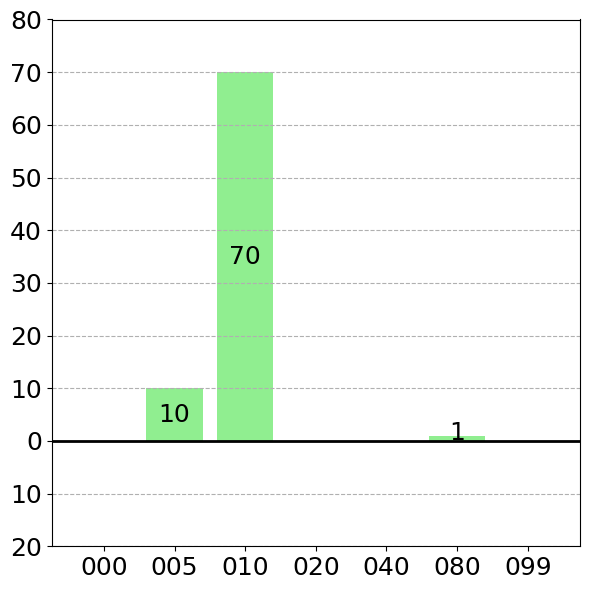

In [74]:
# Create and display the plot
fig = create_waterfall_plot(predictions_df)
plt.show()

## prediction score plot

In [75]:
def debug_prediction_distribution(result_df, qval_threshold=0.01, proba_threshold=0.01):
    """
    Debug function to track where phosphopeptides are being filtered out
    """
    # Filter for phosphopeptides only
    phospho_mask = result_df['mods'].str.contains('Phospho', na=False)
    phospho_df = result_df[phospho_mask].copy()
    print(f"Total phosphopeptides: {len(phospho_df)}")
    
    # Check each threshold
    threshold = '020'  # Focus on 020 threshold
    
    # 1. Check how many pass initial quality filters
    quality_mask = (
        (phospho_df[f'{threshold}_qval'] <= qval_threshold) & 
        (phospho_df[f'{threshold}_proba'] <= proba_threshold) &
        (phospho_df[f'{threshold}_found'])
    )
    print(f"\nFor threshold {threshold}:")
    print(f"Peptides passing quality filters: {quality_mask.sum()}")
    
    # 2. Check predictions for filtered peptides
    filtered_df = phospho_df[quality_mask]
    
    # Check each prediction site
    for site in range(1, 4):
        pred_col = f'prediction_site{site}'
        has_pred = filtered_df[pred_col].notna()
        valid_pred = (filtered_df[pred_col] >= 0) & (filtered_df[pred_col] <= 1)
        
        print(f"\nSite {site}:")
        print(f"Peptides with predictions: {has_pred.sum()}")
        print(f"Peptides with valid predictions (0-1): {valid_pred.sum()}")
        
        # Sample of peptides missing predictions
        missing_preds = filtered_df[~has_pred].head(3)
        print(f"\nSample of peptides missing predictions for site {site}:")
        for _, row in missing_preds.iterrows():
            print(f"Precursor: {row['precursor_id']}")
            print(f"ModifiedPeptide: {row['ModifiedPeptide']}")
            print(f"Proteins: {row['proteins']}")
            print(f"Mods: {row['mods']}")
            print(f"Mod sites: {row['mod_sites']}")
            print("---")
    
    return phospho_df[quality_mask]

In [76]:
# Create and display the plot
fig = debug_prediction_distribution(predictions_df)
plt.show()

Total phosphopeptides: 1941

For threshold 020:
Peptides passing quality filters: 0

Site 1:
Peptides with predictions: 0
Peptides with valid predictions (0-1): 0

Sample of peptides missing predictions for site 1:

Site 2:
Peptides with predictions: 0
Peptides with valid predictions (0-1): 0

Sample of peptides missing predictions for site 2:

Site 3:
Peptides with predictions: 0
Peptides with valid predictions (0-1): 0

Sample of peptides missing predictions for site 3:


In [77]:
predictions_df[predictions_df["precursor_id"] == 'AAPEAS[Phospho]SPPASPLQHLLPGK/3']

,precursor_id,run,StrippedPeptide,ModifiedPeptide,proteins,mods,mod_sites,charge,005_found,005_qval,005_proba,010_found,010_qval,010_proba,020_found,020_qval,020_proba,040_found,040_qval,040_proba,080_found,080_qval,080_proba,099_found,099_qval,099_proba,prediction_site1,protein_site1,position_site1,prediction_site2,protein_site2,position_site2,prediction_site3,protein_site3,position_site3
3909,AAPEAS[Phospho]SPPASPLQHLLPGK/3,Orbitrap_Exploris_480_Phospho_Enriched_01,AAPEASSPPASPLQHLLPGK,AAPEAS[Phospho]SPPASPLQHLLPGK,Q96TA1,Phospho@S,6,3,False,NaN,NaN,True,0.000000,0.017554,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,0.9016,Q96TA1,691.0,NaN,NaN,NaN,NaN,NaN,NaN
3910,AAPEAS[Phospho]SPPASPLQHLLPGK/3,Orbitrap_Exploris_480_Phospho_Enriched_02,AAPEASSPPASPLQHLLPGK,AAPEAS[Phospho]SPPASPLQHLLPGK,Q96TA1,Phospho@S,6,3,True,0.059004,0.111431,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,0.9016,Q96TA1,691.0,NaN,NaN,NaN,NaN,NaN,NaN
3911,AAPEAS[Phospho]SPPASPLQHLLPGK/3,Orbitrap_Exploris_480_Phospho_Enriched_03,AAPEASSPPASPLQHLLPGK,AAPEAS[Phospho]SPPASPLQHLLPGK,Q96TA1,Phospho@S,6,3,False,NaN,NaN,True,0.011475,0.092570,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,0.9016,Q96TA1,691.0,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
def plot_prediction_distribution_bars(result_df, qval_threshold=0.01, proba_threshold=0.01, bin_width=0.01):
    # Add diagnostic prints
    print("DataFrame info:")
    print(result_df.info())
    
    print("\nColumns containing 'prediction':")
    pred_cols = [col for col in result_df.columns if 'prediction' in col]
    print(pred_cols)
    
    # For threshold '020' specifically
    threshold = '020'
    quality_mask = (
        (result_df[f'{threshold}_qval'] <= qval_threshold) & 
        (result_df[f'{threshold}_proba'] <= proba_threshold) &
        (result_df[f'{threshold}_found'])
    )
    
    print(f"\nRows passing '020' filters: {quality_mask.sum()}")
    
    # Check prediction values for these rows
    filtered_df = result_df[quality_mask]
    for site in range(1, 4):
        col = f'prediction_site{site}'
        if col in filtered_df.columns:
            print(f"\n{col} stats:")
            print(f"Non-null count: {filtered_df[col].notna().sum()}")
            print("Value range:", 
                  filtered_df[col].min(), "to", 
                  filtered_df[col].max())
            print("Sample values:\n", filtered_df[col].head())

        # Filter for phosphopeptides only
    phospho_mask = result_df['mods'].str.contains('Phospho', na=False)
    phospho_df = result_df[phospho_mask].copy()
    
    # Define thresholds and create bins
    thresholds = ['005', '010', '020', '040', '080', '099']
    bins = np.arange(0, 1.0, bin_width)
    bin_centers = bins[:-1] + bin_width / 2
    
    # Create figure
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Get counts for each threshold
    counts_per_threshold = []
    for threshold in thresholds:
        quality_mask = (
            (phospho_df[f'{threshold}_qval'] <= qval_threshold) & 
            (phospho_df[f'{threshold}_proba'] <= proba_threshold) &
            (phospho_df[f'{threshold}_found'])
        )
        
        # Collect predictions from all sites
        predictions = []
        for site in range(1, 4):
            site_predictions = phospho_df.loc[quality_mask, f'prediction_site{site}'].dropna()
            predictions.extend(site_predictions[(site_predictions >= 0) & (site_predictions <= 1)])
        
        # Get histogram counts
        counts, _ = np.histogram(predictions, bins=bins)
        counts_per_threshold.append(counts)
    
    # Convert to numpy array
    counts_per_threshold = np.array(counts_per_threshold)
    
    # Create stacked bar chart
    bottom = np.zeros(len(bins) - 1)
    bars = []
    # Define colors for each threshold
    colors = ['#377EB8', '#4DAF4A', '#984EA3', '#FF7F00', '#FFFF33', 'Grey']
    
    for i, (counts, threshold) in enumerate(zip(counts_per_threshold, thresholds)):
        bars.append(ax.bar(bin_centers, counts, bottom=bottom, width=bin_width,
                          color=colors[i], alpha=0.7))
        bottom += counts
    
    # Add vertical lines for thresholds
    threshold_values = [0.05, 0.10, 0.20, 0.40, 0.80, 0.99]
    for val in threshold_values:
        ax.axvline(x=val, color='black', linestyle='--', linewidth=2, alpha=0.4)
    
    # Add gridlines
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Set axis limits
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(0, 12)  # Set y-axis maximum to 55
    
    # Format axis ticks
    ax.tick_params(axis='both', which='major', labelsize=24)
    # Set specific x-axis ticks
    specific_ticks = [0.0, 0.2, 0.4, 0.6 ,0.8, 1.0]
    ax.set_xticks(specific_ticks)
    ax.set_xticklabels([f'{x:.1f}' for x in specific_ticks])

    plt.tight_layout()
    
    return fig

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2865 entries, 15294 to 11678
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   precursor_id      2865 non-null   object 
 1   run               2865 non-null   object 
 2   StrippedPeptide   2865 non-null   object 
 3   ModifiedPeptide   2865 non-null   object 
 4   proteins          2865 non-null   object 
 5   mods              2133 non-null   object 
 6   mod_sites         2133 non-null   object 
 7   charge            2865 non-null   int64  
 8   005_found         2865 non-null   bool   
 9   005_qval          1545 non-null   float64
 10  005_proba         1545 non-null   float64
 11  010_found         2865 non-null   bool   
 12  010_qval          1659 non-null   float64
 13  010_proba         1659 non-null   float64
 14  020_found         2865 non-null   bool   
 15  020_qval          904 non-null    float64
 16  020_proba         904

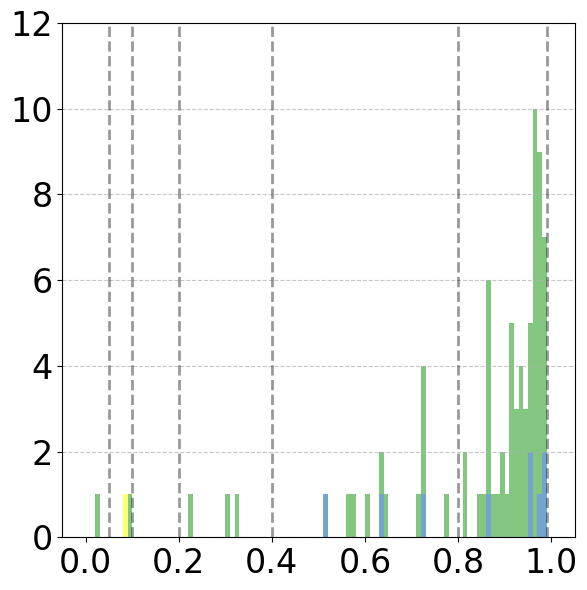

In [86]:
# Create and display the plot
fig = plot_prediction_distribution_bars(predictions_df)
plt.show()

In [80]:
def plot_prediction_distribution(result_df, bin_width=0.01):
    """
    Creates a simple histogram of prediction scores.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Create figure
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Collect predictions from all sites
    predictions = []
    for site in range(1, 4):
        site_predictions = result_df[f'prediction_site{site}'].dropna()
        predictions.extend(site_predictions[(site_predictions >= 0) & (site_predictions <= 1)])
    
    # Create bins
    bins = np.arange(0, 1.0 + bin_width, bin_width)
    
    # Create histogram
    ax.hist(predictions, bins=bins, color='gray', alpha=0.7)
    
    # Add vertical threshold lines
    thresholds = [0.05, 0.10, 0.20, 0.40, 0.80, 0.99]
    for val in thresholds:
        ax.axvline(x=val, color='black', linestyle='--', linewidth=1, alpha=0.4)
    
    # Customize plot
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(0, 250)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_xticks(np.arange(0, 1.1, 0.1))
    ax.set_xticklabels([f'{x:.1f}' for x in np.arange(0, 1.1, 0.1)])
    
    plt.tight_layout()
    return fig

## line plot confidenfe

In [87]:
def calculate_sensitivity_data(result_df, min_threshold=0.0001, max_threshold=0.05, num_points=500):
    """
    Calculate sensitivity data showing how number of phosphopeptide identifications
    varies with confidence thresholds for each analysis threshold.
    
    Args:
        result_df: DataFrame containing phosphopeptide analysis results
        min_threshold: Minimum confidence threshold to evaluate
        max_threshold: Maximum confidence threshold to evaluate
        num_points: Number of threshold points to evaluate
    """
    # Generate evenly spaced thresholds on log scale
    thresholds = np.logspace(np.log10(min_threshold), np.log10(max_threshold), num_points)
    
    # Define analysis thresholds to evaluate
    analysis_thresholds = ['005', '010', '020', '040', '080']
    
    # Initialize results dictionary
    results = {thresh: [] for thresh in analysis_thresholds}
    
    # Filter for phosphopeptides
    phospho_df = result_df[result_df['mods'].str.contains('Phospho', na=False)].copy()
    
    # Calculate identifications for each threshold combination
    for confidence_threshold in thresholds:
        for analysis_threshold in analysis_thresholds:
            # Apply confidence filters for this threshold
            mask = (
                phospho_df[f'{analysis_threshold}_found'] &
                (phospho_df[f'{analysis_threshold}_qval'] <= confidence_threshold) &
                (phospho_df[f'{analysis_threshold}_proba'] <= confidence_threshold)
            )
            
            # Count unique precursors meeting criteria
            unique_precursors = phospho_df[mask]['precursor_id'].nunique()
            results[analysis_threshold].append(unique_precursors)
    
    return thresholds, results

def plot_sensitivity_data(thresholds, results):
    """
    Create sensitivity plot showing identification rates across confidence thresholds.
    Enhanced with improved visual styling and clearer data presentation.
    """
    # Define colors for different analysis thresholds with better contrast
    colors = {
    '005': '#377EB8',  # Blue
    '010': '#4DAF4A',  # Green
    '020': '#984EA3',  # Purple
    '040': '#FF7F00',  # Orange
    '080': '#FFFF33'   # Yellow
    }
    
    # Create figure with specified dimensions
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Plot lines for each analysis threshold with enhanced styling
    for threshold in results.keys():
        ax.plot(thresholds, results[threshold], '-', 
                label=f'Threshold {threshold}',
                color=colors[threshold],
                linewidth=2)
    
    # Add reference line at standard threshold (0.01)
    ax.axvline(x=0.01, color='black', linestyle='--', linewidth=1, alpha=0.7,
               label='Confidence Threshold (0.01)')
    
    # Customize axes with clear labeling
    ax.set_xscale('log')
    ax.tick_params(axis='x', labelsize=24)
    
    # Set tick positions and labels for clear reading
    ax.xaxis.set_minor_locator(plt.NullLocator())
    
    # Set y-axis limits and ticks for optimal data display
    ax.set_ylim(0, 500)
    ax.set_yticks(np.arange(0,501, 50))
    ax.set_yticklabels([str(int(y)) for y in np.arange(0, 501, 50)], 
                       fontsize=24)
    
    # Add grid for better readability
    ax.grid(True, which='major', linestyle='--', alpha=0.7)
    # Add legend with larger font
    
    plt.tight_layout()
    return fig

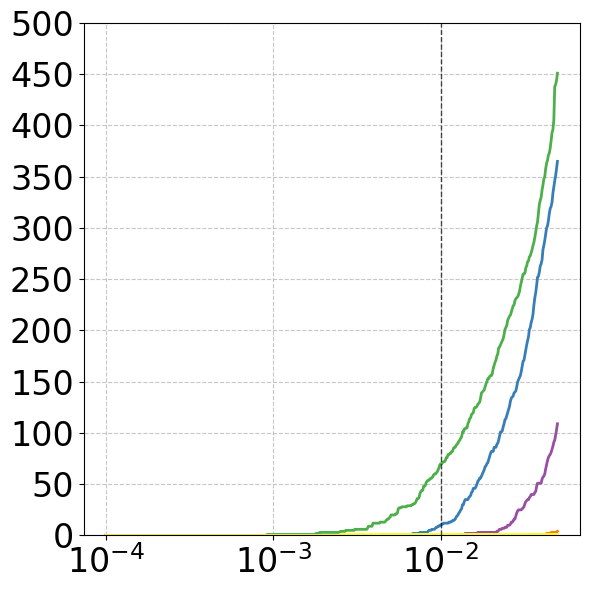

In [88]:
# Calculate sensitivity data
thresholds, results = calculate_sensitivity_data(predictions_df)

# Create and display the plot
fig = plot_sensitivity_data(thresholds, results)
plt.show()